In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [20]:
df = pd.read_csv("updated.csv")
df['remaining_quantity'] = df['demand'] - df['available']

In [21]:
def scale(x):
    if "kg" in x:
        return float(x[:-2])*1000
    elif "g" in x:
        return float(x[:-1])
    elif "ml" in x:
        return float(x[:-2])
    elif "l" in x or "L" in x:
        return float(x[:-1])*1000
    else:
        return float(x)

In [22]:
df['weight'] = df['weight'].apply(scale)
chosen_features = ["expire_in", "remaining_quantity", "price", "weight"]

In [23]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    scaler = StandardScaler()
    model = scaler.fit(df[chosen_features])
    scaled_data = model.transform(df[chosen_features])
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
 
    distortions.append(sum(np.min(cdist(df[chosen_features], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df[chosen_features].shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df[chosen_features], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df[chosen_features].shape[0]
    mapping2[k] = kmeanModel.inertia_

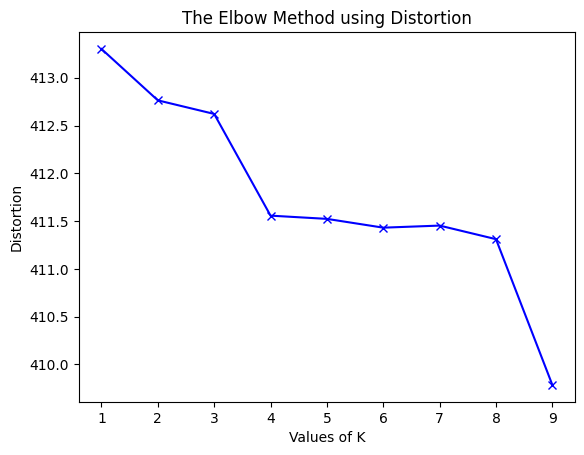

In [24]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [25]:
df_km = df[chosen_features]

In [26]:
scaler = StandardScaler()
model = scaler.fit(df[chosen_features])
scaled_data = model.transform(df[chosen_features])
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(scaled_data)

df_km["Y"]= kmeanModel.predict(scaled_data)

/tmp/ipykernel_321396/3742371181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_km["Y"]= kmeanModel.predict(scaled_data)


In [27]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'scaler.pkl') 
  
# Load the model from the file 
scaler = joblib.load('scaler.pkl') 
  
# Use the loaded model to make predictions 
scaled_data = scaler.transform(df[chosen_features])

In [28]:

# 0 - recycle 0 1 
# 1 - distribute 3 2

In [29]:
df_km.loc[df_km["Y"]==2,'Y'] = 0
df_km.loc[df_km["Y"]==3,'Y'] = 1
df_km.loc[df_km["Y"]==1,'Y'] = 1

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df_km[chosen_features])

In [31]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, df_km["Y"])

KNeighborsClassifier(n_neighbors=2)

In [32]:
knn.predict(X_train)

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [33]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(knn, 'knn.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('knn.pkl') 

scaler = joblib.load('scaler.pkl') 
  
# Use the loaded model to make predictions 
scaled_data = scaler.transform(df[chosen_features])
# Use the loaded model to make predictions 
knn_from_joblib.predict(scaled_data) 

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [25]:
df

,id,name,expiresAt,price,weight,packagingUnit,available,manufacture_date,date_diff,expire_in,demand,store_id,remaining_quantity
0,8376291,Organic Cherry Tomatoes,2024-09-23,2.99,250.0,punnet,48,2024-09-07 02:03:55.038909,15 days 21:56:04.961091,15,51,1,3
1,5728364,Sweet Potatoes,2024-10-15,1.79,1000.0,bag,23,2024-09-07 02:03:55.038909,37 days 21:56:04.961091,37,24,1,1
2,9126483,Broccoli Florets,2024-09-18,2.49,400.0,bag,17,2024-09-07 02:03:55.038909,10 days 21:56:04.961091,10,14,1,-3
3,4537281,Red Bell Peppers,2024-12-02,1.29,500.0,each,62,2024-09-07 02:03:55.038909,85 days 21:56:04.961091,85,67,1,5
4,1928374,Baby Spinach,2024-09-27,3.99,150.0,bag,8,2024-09-07 02:03:55.038909,19 days 21:56:04.961091,19,6,1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,1728391,"Mung Beans, Whole, 1kg",2025-01-14,4.99,1000.0,Bag,75,2024-09-07 02:03:55.038909,128 days 21:56:04.961091,128,77,5,2
1761,6283742,"Fava Beans, Dried, 250g",2024-11-09,2.29,250.0,Bag,10,2024-09-07 02:03:55.038909,62 days 21:56:04.961091,62,38,5,28
1762,3847292,"Adzuki Beans, Organic, 500g",2025-04-22,3.79,500.0,Bag,36,2024-09-07 02:03:55.038909,226 days 21:56:04.961091,226,56,5,20
1763,5928372,"Soybeans, Yellow, 1kg",2024-09-29,3.29,1000.0,Bag,68,2024-09-07 02:03:55.038909,21 days 21:56:04.961091,21,99,5,31


In [65]:
import math

In [37]:
df_store1 = df[df['store_id'] == 1]
df_store2 = df[df['store_id'] == 2]
df_store3 = df[df['store_id'] == 3]
df_store4 = df[df['store_id'] == 4]
df_store5 = df[df['store_id'] == 5]

In [57]:
def get_store(product_id, current_store=1 ):
    return df[(df['store_id'] != current_store) & (df['id'] == product_id)][['store_id' ,'remaining_quantity']]
for i in df['id'].values:
    print(get_store(i, 1))

      store_id  remaining_quantity
353          2                  45
706          3                  12
1059         4                  40
1412         5                   0


In [61]:
label = [[0,0,0,0] ]

array([8376291, 5728364, 9126483, ..., 3847292, 5928372, 8374627])

In [5]:
import math

In [1]:
from together import Together

In [2]:
def find_the_product_recommendation(product_name: str = '', product_quantity: int = ''):
    """
    """
    TOGETHER_API = "#API_KEY"


    client = Together(api_key=TOGETHER_API)

    response = client.chat.completions.create(
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        messages=[
            {
                    "role": "user",
                    "content": f"Assume you are a Chief. I have {product_quantity} of {product_name}. I want all the products that could be done"
            },
    ],
        max_tokens=6342,
        temperature=0.7,
        top_p=0.7,
        top_k=50,
        repetition_penalty=1,
        stop=["<|eot_id|>","<|eom_id|>"],
        stream=True
    )
    all_text = str().join([chunk.choices[0].text for chunk in response])
    return all_text

In [3]:
def handle_get_kilometer_from_gps(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [16]:
import pandas as pd
current_store_id = 1
product_id = 8376291
store_from_model = [2, 4, 5, 3] 
main_gps  = 49.4873357297657, 8.466263441912194
a2 = 49.46714125585514, 8.481209709068896
a3 = 49.546064226685544, 8.441416765251992
a4  = 49.51673542357937, 8.353278664116408
a5 = 49.45735006577803, 8.422489683636131


demand = [[],[]]
def get_balance_model(df):
    required_demand = df[(df['store_id'] == current_store_id) & (df['id'] == product_id)]['demand'].values[0]
    print(required_demand)
    
    for store in store_from_model:
        if store == 2: gps = a2
        elif store == 3: gps = a3
        elif store == 4: gps = a4
        elif store == 5: gps = a5
        demand_in_store = df[(df['store_id'] == store ) & (df['id'] == product_id)]['demand'].values[0]
        available_in_store = df[(df['store_id'] == store ) & (df['id'] == product_id)]['available'].values[0]        
        if (demand_in_store - available_in_store) < 0 :
            balance_demand = required_demand - -(demand_in_store - available_in_store)
        else:
            print(demand_in_store - available_in_store)
            balance_demand = required_demand 
        product_name = df[(df['store_id'] == store ) & (df['id'] == product_id)]['name'].values[0]
        demand[0].append(balance_demand)
        demand[1].append(handle_get_kilometer_from_gps(main_gps[0], main_gps[1],gps[0], gps[1]))
    
    sorted_demand = sorted(demand[0])
    sorted_gps = sorted(demand[1])
    print(sorted_gps)
    for each in sorted_demand:
        required_gps = demand[0].index
        # print(demand[1][required_gps])
        # sorted_list = sorted(demand[1])
        
        print(each)

    
    print(demand)
    print(balance_demand)
    # if balance_demand >= 1:
    #     response = find_the_product_recommendation(product_name, balance_demand)
    #     print(response)
get_balance_model(pd.read_csv('updated.csv', index_col=False))


51
45
40
0
12
[2.4916767527410397, 4.595794317342663, 6.772171981687822, 8.789454777176799]
51
51
51
51
[[np.int64(51), np.int64(51), np.int64(51), np.int64(51)], [2.4916767527410397, 8.789454777176799, 4.595794317342663, 6.772171981687822]]
51
